<a href="https://colab.research.google.com/github/CLASS-SZ/class_sz/blob/master/docs/notebooks/classy_sz_colab_dr6_emus_mnu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install classy_sz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 MB 9.9 MB/s eta 0:00:00
  Created wheel for mcfit: filename=mcfit-0.0.22-py3-none-any.whl size=27924 sha256=b8cbf7c9f8759df61d53be6f07e67f2e0efaf93761695c567aa218be5e1b447f
  Stored in directory: /root/.cache/pip/wheels/b7/cb/1b/95516c5bc48f8bc7fb1f2e3480da8684561b5f1af5d1e66272
Successfully built mcfit


In [2]:
import classy_sz

PATH_TO_CLASS_SZ_DATA not set. Setting it now...
Defaulting to: /root/class_sz_data_directory
--> class_sz_data_directory directory or repositories not found. Cloning repositories in your system!
Deleting: /root/class_sz_data_directory/lcdm/growth-and-distances/DAZ_v1.pkl
Deleting: /root/class_sz_data_directory/lcdm/growth-and-distances/S8Z_v1.pkl
Deleting: /root/class_sz_data_directory/lcdm/growth-and-distances/HZ_v1.pkl
Deleting: /root/class_sz_data_directory/lcdm/PK/PKL_v1.pkl
Deleting: /root/class_sz_data_directory/lcdm/PK/PKNL_v1.pkl
Deleting: /root/class_sz_data_directory/lcdm/TTTEEE/TT_v1.pkl
Deleting: /root/class_sz_data_directory/lcdm/TTTEEE/TE_v1.pkl
Deleting: /root/class_sz_data_directory/lcdm/TTTEEE/EE_v1.pkl
Deleting: /root/class_sz_data_directory/lcdm/derived-parameters/DER_v1.pkl
Deleting: /root/class_sz_data_directory/lcdm/PP/PP_v1.pkl
Deleting: /root/class_sz_data_directory/mnu/growth-and-distances/DAZ_mnu_v1.pkl
Deleting: /root/class_sz_data_directory/mnu/growth-and-d

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<fro

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


0.811879241826057
0.7051587403488777


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


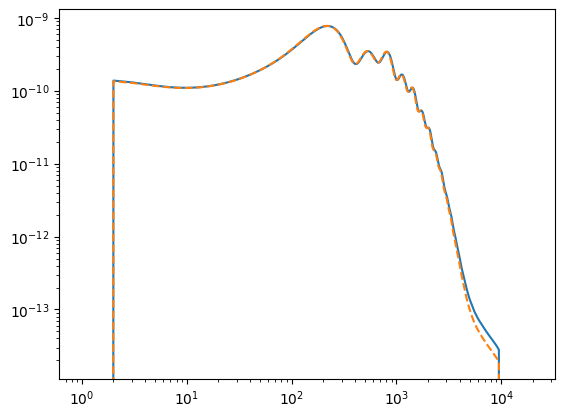

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665
}

classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':'tCl,lCl,pCl,mPk',
'skip_cmb': 0,
'skip_input': 1,
'cosmo_model': 6,
'skip_sigma8_and_der': 0,
'skip_background_and_thermo': 1,
'm_ncdm': 0.02,
'skip_chi': 0,
'skip_hubble': 0,
})


classy_sz.compute_class_szfast()
print(classy_sz.sigma8())
ls = classy_sz.lensed_cl()['ell']
cls = classy_sz.lensed_cl()['tt']
dls = ls*(ls+1)/2./np.pi*cls
plt.loglog(ls,dls)
classy_sz.set(
    {
    'm_ncdm': 0.2,
    }
)
classy_sz.compute_class_szfast()
print(classy_sz.sigma8())
ls = classy_sz.lensed_cl()['ell']
cls = classy_sz.lensed_cl()['tt']
dls = ls*(ls+1)/2./np.pi*cls
plt.loglog(ls,dls,ls='--')